In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
plt.rc("font",size=14)

In [9]:
import glob

# params

In [11]:
inPath = "/glade/scratch/doubrawa/post_processing/"

In [4]:
lss    = {"LES_25" :'-',
          "LES_100":'--'}
labels = {"LES_25" :'LES ($\Delta=25$ m)',
          "LES_100":'LES ($\Delta=100$ m)'}

# i/o of sometimg else

# i/o of zi

In [30]:
days = [20,21,28,29,30]

zis = {}

for day in days:
    filename = glob.glob(os.path.join(inPath,"PBLH_SPATIAL*March{0}*".format(day)))[0]
    print(filename)
    zi = pd.read_csv(filename,index_col=[0],parse_dates=True,header=None)
    zis[day] = zi.copy()

/glade/scratch/doubrawa/post_processing/PBLH_SPATIAL_AVG_15km_by_15km_D02_March20.csv
/glade/scratch/doubrawa/post_processing/PBLH_SPATIAL_AVG_15km_by_15km_D02_March21.csv
/glade/scratch/doubrawa/post_processing/PBLH_SPATIAL_AVG_15km_by_15km_D02_March28.csv
/glade/scratch/doubrawa/post_processing/PBLH_SPATIAL_AVG_15km_by_15km_D02_March29.csv
/glade/scratch/doubrawa/post_processing/PBLH_SPATIAL_AVG_15km_by_15km_D02_March30.csv


# i/o

In [103]:
day = 28

In [70]:
fpaths = sorted(glob.glob(os.path.join(inPath,"LES_25m_SPATIAL_AVERAGED_PROFILES_2015-03-{0}_*".format(day))))

In [71]:
dfs = {}

for fpath in fpaths:
    
    pd_date = pd.to_datetime(os.path.split(fpath)[-1].split('PROFILES_')[-1].split('.csv')[0],format="%Y-%m-%d_%H:%M:%S")
    df = pd.read_csv(fpath,index_col=[0])
    dfs[pd_date] = df.copy()

In [72]:
print(dfs[pd_date].head())

                  u         v       theta         w  z_std_xy       u_u  \
z                                                                         
5.673293   4.295291  0.112245  308.187050 -0.016316  0.016374  1.723361   
17.368736  6.064431  0.130682  308.093114 -0.027551  0.050039  3.090205   
29.793495  7.248621  0.140969  308.014082 -0.035558  0.085715  4.137407   
43.003452  8.048827  0.154262  307.947891 -0.041066  0.123659  4.852575   
57.048351  8.563522  0.171349  307.897042 -0.044799  0.164100  5.268926   

                u_v       u_w       v_v       v_w   w_theta       w_w  
z                                                                      
5.673293  -0.329221 -0.021555  1.513724 -0.004421  0.002974  0.022977  
17.368736 -0.745310 -0.107120  2.614351 -0.004730  0.009145  0.040492  
29.793495 -1.119393 -0.192793  3.442445 -0.004075  0.017731  0.072868  
43.003452 -1.392393 -0.258410  4.025633 -0.004607  0.026903  0.118148  
57.048351 -1.562678 -0.297235  4.359024 -0

# viz

### ===> tke

In [109]:
df.z_std_xy.loc[0:2000]

z
5.691783       0.016419
17.420648      0.050077
29.872356      0.085655
43.104065      0.123482
57.166937      0.163730
72.115893      0.206532
88.009157      0.252021
104.907486     0.300312
122.875253     0.351529
141.980198     0.405822
162.294324     0.463366
183.894522     0.524341
206.861805     0.588920
231.282391     0.657278
257.247848     0.729615
284.855474     0.806156
314.208506     0.887140
345.416375     0.972809
378.595619     1.063408
413.869932     1.159164
451.370707     1.260311
491.237113     1.367156
533.616913     1.480025
578.667242     1.599125
626.554753     1.724540
677.456207     1.856212
731.559899     1.993870
789.065892     2.137275
850.185743     2.286088
915.144916     2.439555
984.182604     2.597014
1057.552284    2.758350
1135.523806    2.924204
1218.383079    3.096383
1306.433701    3.276889
1399.997394    3.466640
1499.413289    3.666170
1605.038335    3.876773
1717.247452    4.099268
1836.437091    4.333293
1963.025978    4.579028
Name: z_std_xy

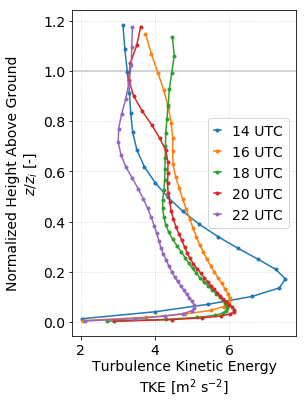

In [110]:
fig = plt.figure(figsize=(4,6))
ax  = fig.add_subplot(111)

ax.grid(color='lightgrey',linestyle=':')
ax.axhline(y=1.0, color='lightgrey', linestyle='-',lw=2)

for hour in np.arange(14,24,2):
    
    pd_date = pd.to_datetime("2015-03-{0} {1}:10:00".format(day,hour),format="%Y-%m-%d %H:%M:%S")
    zi_now = float(zis[day].loc["{0:%Y-%m-%d %H:%M}".format(pd_date)].values)
    df = dfs[pd_date]
    
    tke = 0.5*(df.u_u + df.v_v + df.w_w)
    subset = tke.loc[0:2000]
    
    tke_norm = tke.copy()
    tke_norm.index = tke_norm.index/zi_now
    subset_norm = tke_norm.loc[0:1.2]
    
    ax.plot(subset_norm.values, subset_norm.index,label=str(hour)+" UTC",marker='.')


ax.set_xlabel("Turbulence Kinetic Energy\n"+"TKE [m$^2$ s$^{{-2}}$]")    
ax.set_ylabel("Normalized Height Above Ground\n"+"$z/z_i$ [-]")        
plt.legend(handlelength=0.5)
fig.savefig("/glade/u/home/doubrawa/figs/RLES_PROFILE_TKE_March{0}.png".format(day),dpi=300,bbox_inches='tight')

### ===> w_theta

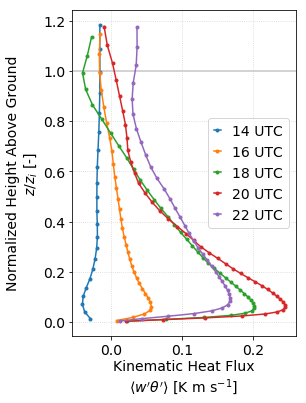

In [111]:
fig = plt.figure(figsize=(4,6))
ax  = fig.add_subplot(111)

ax.grid(color='lightgrey',linestyle=':')
ax.axhline(y=1.0, color='lightgrey', linestyle='-',lw=2)


for hour in np.arange(14,24,2):
    
    pd_date = pd.to_datetime("2015-03-{0} {1}:10:00".format(day,hour),format="%Y-%m-%d %H:%M:%S")
    zi_now = float(zis[day].loc["{0:%Y-%m-%d %H:%M}".format(pd_date)].values)
    df = dfs[pd_date]
    
    subset = df["w_theta"]
    
    subset_norm = subset.copy()
    subset_norm.index = subset_norm.index/zi_now
    subset_norm = subset_norm.loc[0:1.2]
    
    subset = subset.loc[0:2000]
    
    ax.plot(subset_norm.values, subset_norm.index,label=str(hour)+" UTC",marker='.')


ax.set_xlabel("Kinematic Heat Flux\n"+r"$\langle w' \theta ' \rangle$ [K m s$^{{-1}}$]")    
ax.set_ylabel("Normalized Height Above Ground\n"+"$z/z_i$ [-]")    
plt.legend(handlelength=0.5)
fig.savefig("/glade/u/home/doubrawa/figs/RLES_PROFILE_WTH_March{0}.png".format(day),dpi=300,bbox_inches='tight')

### ===> ws

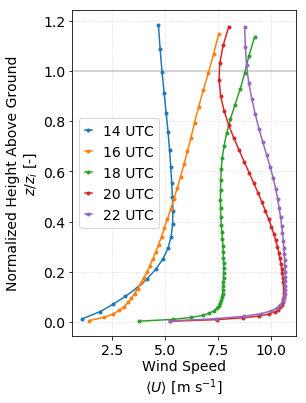

In [112]:
fig = plt.figure(figsize=(4,6))
ax  = fig.add_subplot(111)

ax.grid(color='lightgrey',linestyle=':')
ax.axhline(y=1.0, color='lightgrey', linestyle='-',lw=2)


for hour in np.arange(14,24,2):
    
    pd_date = pd.to_datetime("2015-03-{0} {1}:10:00".format(day,hour),format="%Y-%m-%d %H:%M:%S")
    zi_now = float(zis[day].loc["{0:%Y-%m-%d %H:%M}".format(pd_date)].values)
    df = dfs[pd_date]
    
    subset = (df["u"]**2 + df["v"]**2)**0.5
    
    subset_norm = subset.copy()
    subset_norm.index = subset_norm.index/zi_now
    subset_norm = subset_norm.loc[0:1.2]
    
    subset = subset.loc[0:2000]
    
    ax.plot(subset_norm.values, subset_norm.index,label=str(hour)+" UTC",marker='.')

ax.set_xlabel("Wind Speed\n"+r"$\langle U \rangle$ [m s$^{{-1}}$]")    
ax.set_ylabel("Normalized Height Above Ground\n"+"$z/z_i$ [-]")    
plt.legend(handlelength=0.5)
fig.savefig("/glade/u/home/doubrawa/figs/RLES_PROFILE_WSPD_March{0}.png".format(day),dpi=300,bbox_inches='tight')